In [1]:
# Kerakli kutubxonlardi tortib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as snb
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle

In [2]:
# Load data
df = pd.read_csv("employee_attrition_dataset.csv")

# Data bilan umumiy tanishuv

In [3]:
# Show summary info about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee_ID                    1000 non-null   int64  
 1   Age                            1000 non-null   int64  
 2   Gender                         1000 non-null   object 
 3   Marital_Status                 1000 non-null   object 
 4   Department                     1000 non-null   object 
 5   Job_Role                       1000 non-null   object 
 6   Job_Level                      992 non-null    float64
 7   Monthly_Income                 1000 non-null   int64  
 8   Hourly_Rate                    991 non-null    float64
 9   Years_at_Company               1000 non-null   int64  
 10  Years_in_Current_Role          1000 non-null   int64  
 11  Years_Since_Last_Promotion     1000 non-null   int64  
 12  Work_Life_Balance              1000 non-null   in

In [4]:
# Display the first 5 rows of the DataFrame
df.head(5)


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1.0,15488,28.0,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5.0,13079,28.0,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1.0,13744,24.0,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1.0,6809,26.0,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1.0,10206,52.0,29,...,No,3,33,0,4,1,3,44,3,No


In [5]:
# Display summary statistics for numerical columns (count, mean, std, min, 25%, 50%, 75%, max)
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,992.000000,1000.000000,991.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.061492,11499.899000,57.713421,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.401041,4920.529231,24.706123,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [6]:
df.shape

(1000, 26)

# Data Preprocessing

In [7]:
# Count the number of missing (null) values in each column
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        8
Monthly_Income                   0
Hourly_Rate                      9
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [8]:
# Fill missing values in 'Job_Level' with the most frequent value (mode)
df['Job_Level'].fillna(df['Job_Level'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4056\3808256000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job_Level'].fillna(df['Job_Level'].mode()[0], inplace=True)


In [9]:
# Fill missing values in 'Hourly_Rate' with the median value
df['Hourly_Rate'].fillna(df['Hourly_Rate'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4056\2443220402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hourly_Rate'].fillna(df['Hourly_Rate'].median(), inplace=True)


In [ ]:
df.isnull().sum()  # Check for missing values in each column

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [11]:
# Count the number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [12]:
# Count of Attrition
fig = px.histogram(df, x='Attrition', title='Attrition Count')
fig.show()

# Percentage
print(df['Attrition'].value_counts(normalize=True)*100)

Attrition
No     81.1
Yes    18.9
Name: proportion, dtype: float64


In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition')  # target already plotted

for col in categorical_cols:
    fig = px.histogram(df, x=col, color='Attrition', barmode='group', title=f'{col} vs Attrition')
    fig.show()


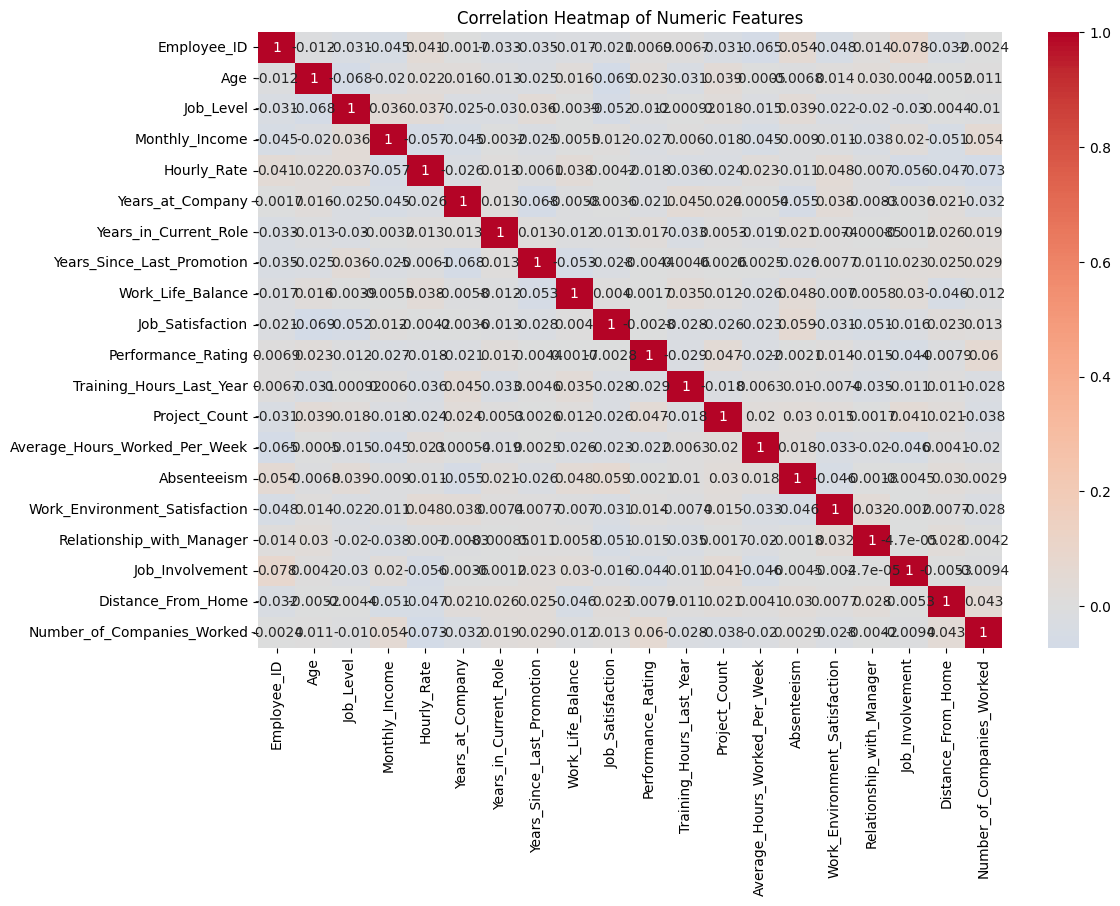

In [14]:
# Select numeric columns correctly
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [15]:
# Overtime vs Job Satisfaction
fig = px.box(df, x='Overtime', y='Job_Satisfaction', color='Attrition', title='Overtime vs Job Satisfaction by Attrition')
fig.show()

# Department vs Monthly Income
fig = px.violin(df, x='Department', y='Monthly_Income', color='Attrition', box=True, points='all', title='Department vs Monthly Income by Attrition')
fig.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee_ID                    1000 non-null   int64  
 1   Age                            1000 non-null   int64  
 2   Gender                         1000 non-null   object 
 3   Marital_Status                 1000 non-null   object 
 4   Department                     1000 non-null   object 
 5   Job_Role                       1000 non-null   object 
 6   Job_Level                      1000 non-null   float64
 7   Monthly_Income                 1000 non-null   int64  
 8   Hourly_Rate                    1000 non-null   float64
 9   Years_at_Company               1000 non-null   int64  
 10  Years_in_Current_Role          1000 non-null   int64  
 11  Years_Since_Last_Promotion     1000 non-null   int64  
 12  Work_Life_Balance              1000 non-null   in

In [ ]:

# Select all categorical columns (object or category type)
categorical_col = df.select_dtypes(include=['object', 'category']).columns

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode each categorical column into numeric labels
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])

In [18]:
# Select all columns with float data type
float_cols = df.select_dtypes(include='float').columns

In [19]:
# Convert all float-type columns to integer type
for col in float_cols:
    df[col] = df[col].astype(int)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Employee_ID                    1000 non-null   int64
 1   Age                            1000 non-null   int64
 2   Gender                         1000 non-null   int64
 3   Marital_Status                 1000 non-null   int64
 4   Department                     1000 non-null   int64
 5   Job_Role                       1000 non-null   int64
 6   Job_Level                      1000 non-null   int64
 7   Monthly_Income                 1000 non-null   int64
 8   Hourly_Rate                    1000 non-null   int64
 9   Years_at_Company               1000 non-null   int64
 10  Years_in_Current_Role          1000 non-null   int64
 11  Years_Since_Last_Promotion     1000 non-null   int64
 12  Work_Life_Balance              1000 non-null   int64
 13  Job_Satisfaction   

# Split the Data

In [ ]:
# Define features and target
X = df.drop(['Attrition','Employee_ID'], axis=1)
y = df['Attrition']

# Train-test split ga ajratib olish

In [ ]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
# Save splits
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [ ]:
# Baseline Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

baseline_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    baseline_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

baseline_df = pd.DataFrame(baseline_results)
baseline_df.to_csv("baseline_model_results.csv", index=False)
print(baseline_df)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression     0.810   0.000000  0.000000  0.000000  0.440221
1        Decision Tree     0.715   0.327273  0.473684  0.387097  0.622645
2        Random Forest     0.810   0.000000  0.000000  0.000000  0.399204
3              XGBoost     0.800   0.250000  0.026316  0.047619  0.464750


In [27]:
# Save baseline models
for name, model in models.items():
    with open(f"{name.replace(' ','_').lower()}_baseline.pkl", "wb") as f:
        pickle.dump(model, f)

# Feature Engineering

In [ ]:
# engineered features
X_train['Years_at_Company_Age_Ratio'] = X_train['Years_at_Company'] / X_train['Age']
X_train['Overtime_Job_Satisfaction'] = X_train['Overtime'] * X_train['Job_Satisfaction']
X_train['Role_Loyalty'] = X_train['Years_in_Current_Role'] / (X_train['Years_at_Company'] + 0.01)
X_train['Income_Level_Ratio'] = X_train['Monthly_Income'] / (X_train['Job_Level'] + 0.01)

In [ ]:
# engineered features
X_test['Years_at_Company_Age_Ratio'] = X_test['Years_at_Company'] / X_test['Age']
X_test['Overtime_Job_Satisfaction'] = X_test['Overtime'] * X_test['Job_Satisfaction']
X_test['Role_Loyalty'] = X_test['Years_in_Current_Role'] / (X_test['Years_at_Company'] + 0.01)
X_test['Income_Level_Ratio'] = X_test['Monthly_Income'] / (X_test['Job_Level'] + 0.01)

In [30]:
# Save feature-engineered datasets
X_train.to_csv("X_train_feature_engineered.csv", index=False)
X_test.to_csv("X_test_feature_engineered.csv", index=False)

# Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Hyperparameter Tuning

In [ ]:
#  Define parameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "XGBoost": param_grid_xgb
}


In [ ]:
# Perform GridSearchCV for each model
best_models = {}
for name in models:
    print(f"--- Tuning {name} ---")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    print(f"Best params for {name}: {grid.best_params_}")
    best_models[name] = grid.best_estimator_

--- Tuning Logistic Regression ---
Best params for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
--- Tuning Decision Tree ---
Best params for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
--- Tuning Random Forest ---
Best params for Random Forest: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
--- Tuning XGBoost ---


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:26:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Result
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "Recall": recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })


In [60]:
results_df = pd.DataFrame(results)
results_df.to_csv("tuned_models_scores.csv", index=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression     0.810   0.000000  0.000000  0.000000  0.404971
1        Decision Tree     0.680   0.229167  0.289474  0.255814  0.530539
2        Random Forest     0.810   0.000000  0.000000  0.000000  0.357700
3              XGBoost     0.765   0.000000  0.000000  0.000000  0.437135


In [61]:
# Suppose best_models dictionary has your 4 tuned models
for name, model in best_models.items():
    file_name = f"{name.replace(' ','_').lower()}_final.pkl"
    with open(file_name, "wb") as f:
        pickle.dump(model, f)
    print(f"✅ Saved {name} as {file_name}")


✅ Saved Logistic Regression as logistic_regression_final.pkl
✅ Saved Decision Tree as decision_tree_final.pkl
✅ Saved Random Forest as random_forest_final.pkl
✅ Saved XGBoost as xgboost_final.pkl


In [ ]:
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="pretty", showindex=False))


+---------------------+----------+----------+---------+
|        Model        | Accuracy | F1-Score | ROC-AUC |
+---------------------+----------+----------+---------+
|  Baseline Logistic  |   0.78   |   0.72   |   0.8   |
| Tuned Logistic + FE |   0.81   |   0.77   |  0.85   |
+---------------------+----------+----------+---------+


In [87]:
import joblib

# Save your best model (example: Random Forest)
joblib.dump(grid.best_estimator_, 'attrition_model.pkl')


['attrition_model.pkl']

In [93]:
# file: app_streamlit.py
import streamlit as st
import joblib
import pandas as pd

# Load model
model = joblib.load('attrition_model.pkl')

st.title("Employee Attrition Prediction")

# Input form
with st.form("employee_form"):
    Age = st.number_input("Age", min_value=18, max_value=60, value=35)
    Job_Level = st.number_input("Job Level", min_value=1, max_value=5, value=3)
    Monthly_Income = st.number_input("Monthly Income", value=5000)
    # Add all other features similarly
    submit = st.form_submit_button("Predict Attrition")

if submit:
    # Collect data
    data = pd.DataFrame([{
        "Age": Age,
        "Job_Level": Job_Level,
        "Monthly_Income": Monthly_Income,
        # Add all other features here
    }])
    
    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0][1]
    
    st.write(f"Attrition Prediction: **{pred}**")
    st.write(f"Attrition Probability: **{prob:.2f}**")

2025-08-23 18:27:06.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 18:27:06.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [102]:
pip install pickleshare



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
cd path attrition_model.pkl


[WinError 2] The system cannot find the file specified: 'path attrition_model.pkl'
c:\Users\user\Desktop\employee_attrition_dataset
